In [3]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [5]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=trans, download=True )
len(mnist_train), len(mnist_test)

(60000, 10000)

In [8]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [35]:
# 本函数已保存在d2lzh包中方便以后使用
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


In [41]:
def show_image(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i, (ax, img) in enumerate(zip(axes.ravel(), imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)

torch.Size([18, 1, 28, 28])


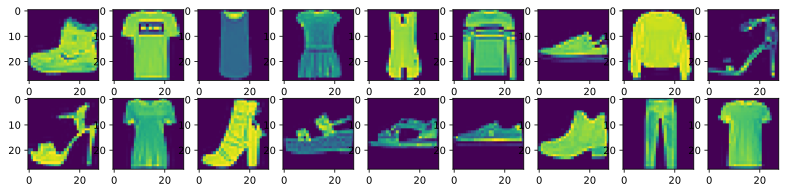

In [44]:
X ,y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_image(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

In [46]:
batch_size = 256
def get_dataloader_workers():
    return 4

train_iter = data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'2.13 sec'